# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [104]:
%pip install plotly


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans

In [106]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [107]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [108]:
# put your answer here
df.head(5)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [109]:
# put your answer here
print("The shape is: ")
df.shape

The shape is: 


(200, 5)

Show summary statistics using `describe()`. `(5 pts)`

In [110]:
# put your answer here
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [111]:
# put your answer here
print("Missing values")
df.isna().sum()


Missing values


,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [112]:
# put your answer here
new_df = df[['AnnualIncome','SpendingScore']]
new_df

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Display the first 10 rows. `(5 pts)`

In [113]:
# put your answer here
df.head(10)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

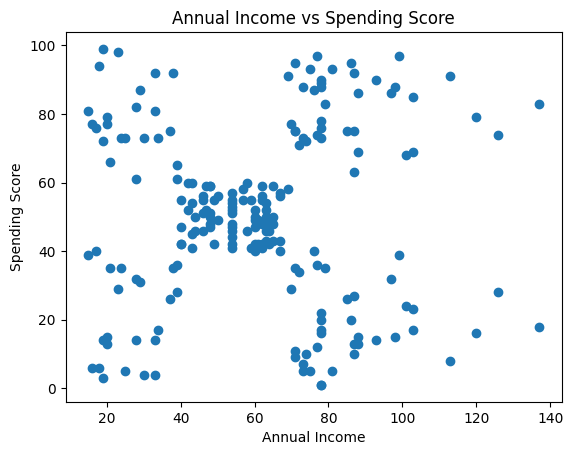

In [114]:
# put your answer here
plt.scatter(new_df['AnnualIncome'], new_df['SpendingScore'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1,WCSS is 269981.28000000014
For cluster = 2,WCSS is 181363.59595959607
For cluster = 3,WCSS is 106348.37306211119
For cluster = 4,WCSS is 73679.78903948837
For cluster = 5,WCSS is 44448.45544793369
For cluster = 6,WCSS is 37233.81451071002
For cluster = 7,WCSS is 30241.34361793659
For cluster = 8,WCSS is 25036.417604033977
For cluster = 9,WCSS is 21916.79478984372
For cluster = 10,WCSS is 20072.070939404


Text(0, 0.5, 'WCSS')

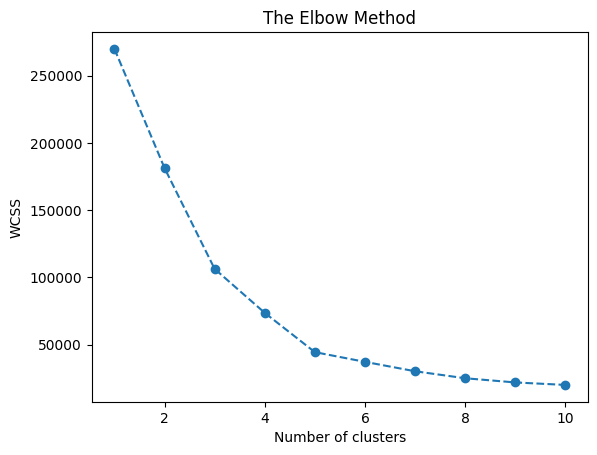

In [115]:
# put your answer here
wcss = []

# running kmeans
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=300, n_init=10)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)
  print("For cluster = {},WCSS is {}".format(i, kmeans.inertia_))

# Plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### From the scatter plot above, it was apparent that the elbow smoothens at cluster 5 which has an WCSS of 44448. This is inline with my initial guess from the scatter plot of the data points at cell 21

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [116]:
# put your answer here
kmeans = KMeans(n_clusters=5)
model_kMeans = kmeans.fit(new_df)
labels = model_kMeans.labels_

# number of model lables
print("All labels: ", model_kMeans.labels_)
print("\nNumber of labels: ", len(model_kMeans.labels_))
df['Cluster'] = labels
print("\n First 10 labeled rows: ")
df.head(10)

All labels:  [0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]

Number of labels:  200

 First 10 labeled rows: 


,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
5,6,Female,22,17,76,4
6,7,Female,35,18,6,0
7,8,Female,23,18,94,4
8,9,Male,64,19,3,0
9,10,Female,30,19,72,4


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

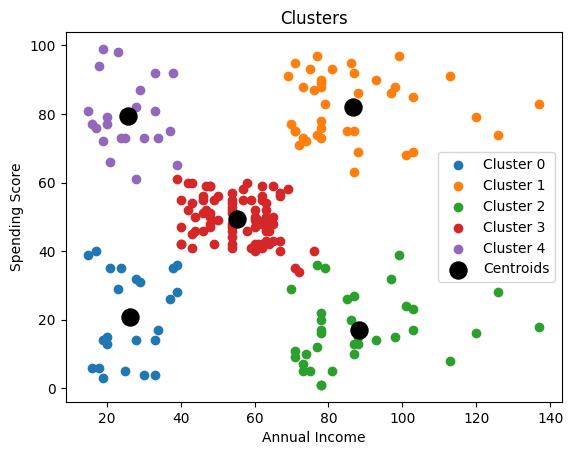

In [117]:
for i in range(5):
    plt.scatter(
        new_df[labels == i]['AnnualIncome'],
        new_df[labels == i]['SpendingScore'],
        label=f'Cluster {i}'
    )
centroids = model_kMeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, marker='o', c='black', edgecolor='black', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters')
plt.legend()
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

1. The cluster that represents high income, low spending users is cluster 1 (orange)

2. The cluster representig low incone, high spending users is cluster 0 (blue)

3. The cluster that might represent as target customers for promotion is cluster 1 (orange) because they are the customers that are rich or high earning people that might be targeted to spend more. Moreover cluster 3 (red) spends a lot and are rich, can be a target for expensive items promotions.

4. There is a huge base of high earning customers that can be target for promotions because this can likely increase their spendings. Additionally, cluster 3 (red) which represents high earning and high spending people can be a target for expensive items promotions

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [118]:
# put your answer here
df_with_age = df[['Age','AnnualIncome','SpendingScore']]
df_with_age
df_with_age.head(10)

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


For cluster = 1,WCSS is 308812.7800000001
For cluster = 2,WCSS is 212840.16982097193
For cluster = 3,WCSS is 143342.75157170597
For cluster = 4,WCSS is 104366.151455562
For cluster = 5,WCSS is 75350.77917248776
For cluster = 6,WCSS is 58300.443321590676
For cluster = 7,WCSS is 51133.031385281414
For cluster = 8,WCSS is 44640.028048530425
For cluster = 9,WCSS is 40809.75122720594
For cluster = 10,WCSS is 37128.008679353865


Text(0, 0.5, 'WCSS')

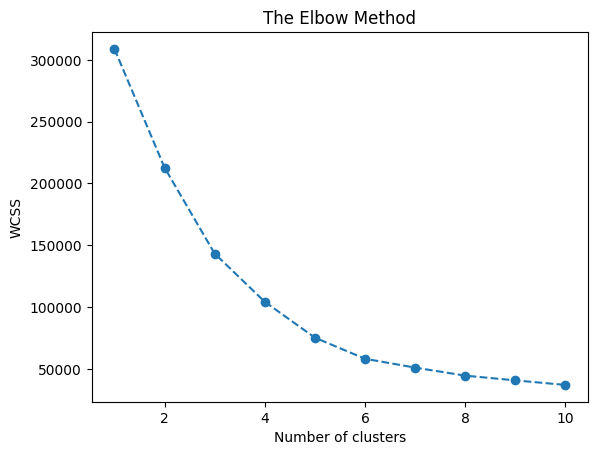

In [119]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=300, n_init=10)
  kmeans.fit(df_with_age)
  wcss.append(kmeans.inertia_)
  print("For cluster = {},WCSS is {}".format(i, kmeans.inertia_))

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [123]:
kmeans = KMeans(n_clusters=5)
model_kMeans_with_age = kmeans.fit(df_with_age)
labels = model_kMeans_with_age.labels_

# number of model lables
print("All labels: ", model_kMeans_with_age.labels_)
print("\nNumber of labels: ", len(model_kMeans_with_age.labels_))
df_with_age['Cluster'] = labels
print("\n First 10 labeled rows: ")
df.head(10)

All labels:  [0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]

Number of labels:  200

 First 10 labeled rows: 


/tmp/ipython-input-3266543776.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
5,6,Female,22,17,76,4
6,7,Female,35,18,6,0
7,8,Female,23,18,94,4
8,9,Male,64,19,3,0
9,10,Female,30,19,72,4


Visualize using a 3D scatter plot. `(5 pts)`

In [128]:
# put your answer here

fig = px.scatter_3d(
    df_with_age,
    x="Age",
    y="AnnualIncome",
    z="SpendingScore",
    color='Cluster',  # Color points based on the 'species' column
    opacity=0.9,      # Adjust marker opacity
    title='3D Plot with Age'
)
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

A lot of high spending, high income indivduals represented by cluster purple, has an age bracket of 20 to 40 years old. This means that they are on the younger side. A business insight we can take from this is to give them a promotions for expensive items that are for the age bracket of 20 to 40 years old like luxury bags, necklaces, etc.

On the other hand, cluster orange that has high income, low spending individuals has a scattered age bracket from 20 to 60. This means, the promotions should cater for that age bracket as well.